In [3]:
import pandas as pd

demo_raw = pd.read_csv("../data/raw/FRED_RAW/macro_demographs.csv")
macro_raw = pd.read_csv("../data/raw/FRED_RAW/wages_productivity_data.csv")

print("Nulls in demo_raw:\n", demo_raw.isnull().sum())
print("Nulls in macro_raw:\n", macro_raw.isnull().sum())


Nulls in demo_raw:
 Unnamed: 0                        0
Average Weekly Earnings All     314
Median Weekly Earnings Men      503
Median Weekly Earnings Women    503
Employment Pop Ratio              0
Labor Force Participation         0
Unemployment Rate Men             0
Unemployment Rate Women           0
dtype: int64
Nulls in macro_raw:
 Unnamed: 0                       0
Productivity                     0
Real Hourly Compensation         0
Hourly Compensation (Nominal)    0
Labor Share                      0
Unit Labor Costs                 0
Hours Worked                     0
dtype: int64


Looks like "macro_raw" is clean. Looks like "Avg. Weekly Earnings All" "Median Weekly Earnings Men" and "Median Weekly Earnings Women" are useless. Should remove those and realign the two datasets to see if they're still worth using. 

In [4]:
demo_clean = demo_raw.drop(columns=[
    'Average Weekly Earnings All',
    'Median Weekly Earnings Men',
    'Median Weekly Earnings Women'
])

demo_clean = demo_clean.dropna()

print("Remainaing nulls after cleaning\n", demo_clean.isnull().sum())
print("Shape after cleaning:", demo_clean.shape)

Remainaing nulls after cleaning
 Unnamed: 0                   0
Employment Pop Ratio         0
Labor Force Participation    0
Unemployment Rate Men        0
Unemployment Rate Women      0
dtype: int64
Shape after cleaning: (548, 5)


In [5]:
demo_clean.to_csv("../data/clean/FRED_CLEAN/demo_clean.csv", index=False)

print("Clean successful...")

Clean successful...


In [6]:
macro_raw.to_csv("../data/clean/FRED_CLEAN/macro_clean.csv", index=False)

print("Clean successful...")

Clean successful...


Ok... looks like I got all null values cleaned and removed. Time to go a step further and get the two cleaned datasets on the same timeframe so they merge cleanly. Will re-assess once this is done. 

In [5]:
import pandas as pd

demo_clean = pd.read_csv("../data/clean/FRED_CLEAN/demo_clean.csv")
macro_clean = pd.read_csv("../data/clean/FRED_CLEAN/macro_clean.csv")

demo_clean.rename(columns=lambda x: x.strip(), inplace=True)
macro_clean.rename(columns=lambda x: x.strip(), inplace=True)

if 'Unamed: 0' in demo_clean.columns:
    demo_clean.rename(columns={'Unamed: 0': 'Date'}, inplace=True)
if 'Unamed: 0' in macro_clean.columns:
    macro_clean.rename(columns={'Unamed: 0': 'Date'}, inplace=True)

print("Demo Columns:", demo_clean.columns.tolist())
print("Macro Columns:", macro_clean.columns.tolist())

demo_clean.to_csv("../data/clean/FRED_CLEAN/demo_clean_fr.csv", index=False)
macro_clean.to_csv("../data/clean/FRED_CLEAN/macro_clean_fr.csv", index=False)

print("Renaming columns succesful... reprint successful...")

Demo Columns: ['Unnamed: 0', 'Employment Pop Ratio', 'Labor Force Participation', 'Unemployment Rate Men', 'Unemployment Rate Women']
Macro Columns: ['Unnamed: 0', 'Productivity', 'Real Hourly Compensation', 'Hourly Compensation (Nominal)', 'Labor Share', 'Unit Labor Costs', 'Hours Worked']
Renaming columns succesful... reprint successful...


So there was an unamed collumn. I decided to change the unamed column to it's proper name, "Date". Now rechecking to make sure everything is fully cleaned for merging. 

In [6]:
import pandas as pd

macro = pd.read_csv("../data/clean/FRED_CLEAN/macro_clean_fr.csv")
demo = pd.read_csv("../data/clean/FRED_CLEAN/demo_clean_fr.csv")

print("Nulls in demo_raw:\n", demo.isnull().sum())
print("Nulls in macro_raw:\n", macro.isnull().sum())


Nulls in demo_raw:
 Unnamed: 0                   0
Employment Pop Ratio         0
Labor Force Participation    0
Unemployment Rate Men        0
Unemployment Rate Women      0
dtype: int64
Nulls in macro_raw:
 Unnamed: 0                       0
Productivity                     0
Real Hourly Compensation         0
Hourly Compensation (Nominal)    0
Labor Share                      0
Unit Labor Costs                 0
Hours Worked                     0
dtype: int64


In [13]:
import pandas as pd

macro = pd.read_csv("../data/clean/FRED_CLEAN/macro_clean_fr.csv")
demo = pd.read_csv("../data/clean/FRED_CLEAN/demo_clean_fr.csv")

print("Demo rows:", demo.shape[0])
print("Macro rows", macro.shape[0])
print("Shared years:", len(set(demo['Date']).intersection(set(macro['Date']))))

Demo rows: 548
Macro rows 182
Shared years: 182


Looks to be fully cleaned. Null values are gone, sections are labeled correctly, dates are corresponding. There is just much more information from the demo csv (expected) than the macro csv. Going to merge and visualize and make a decision of where to go from there. Can always reiterate if it doesn't seem correct.

In [14]:
merged_fred = pd.merge(demo, macro, on='Date', how='inner')
print("Merged shape:", merged_fred.shape)
merged_fred.to_csv("../data/merged/FRED_MERGED/merged_fred.csv", index=False)
print("Merging successful...")

Merged shape: (182, 11)
Merging successful...


Merge successful but the data is looking weird. Going to run some checks and make sure this actually is correct. We shall see.

In [16]:
import pandas as pd 

df = pd.read_csv("../data/merged/FRED_MERGED/merged_fred.csv")

print("Shape:", df.shape)
print("Unique Years:", df['Date'].nunique())

print(df['Date'].value_counts().head())

print(df.columns.tolist())
print(df.head(10))




Shape: (182, 11)
Unique Years: 182
Date
1980-01-01    1
1980-04-01    1
1980-07-01    1
1980-10-01    1
1981-01-01    1
Name: count, dtype: int64
['Date', 'Employment Pop Ratio', 'Labor Force Participation', 'Unemployment Rate Men', 'Unemployment Rate Women', 'Productivity', 'Real Hourly Compensation', 'Hourly Compensation (Nominal)', 'Labor Share', 'Unit Labor Costs', 'Hours Worked']
         Date  Employment Pop Ratio  Labor Force Participation  \
0  1980-01-01                  60.0                       64.0   
1  1980-04-01                  59.4                       63.8   
2  1980-07-01                  58.8                       63.8   
3  1980-10-01                  58.9                       63.7   
4  1981-01-01                  59.1                       63.9   
5  1981-04-01                  59.6                       64.2   
6  1981-07-01                  59.1                       63.8   
7  1981-10-01                  58.8                       63.8   
8  1982-01-01     

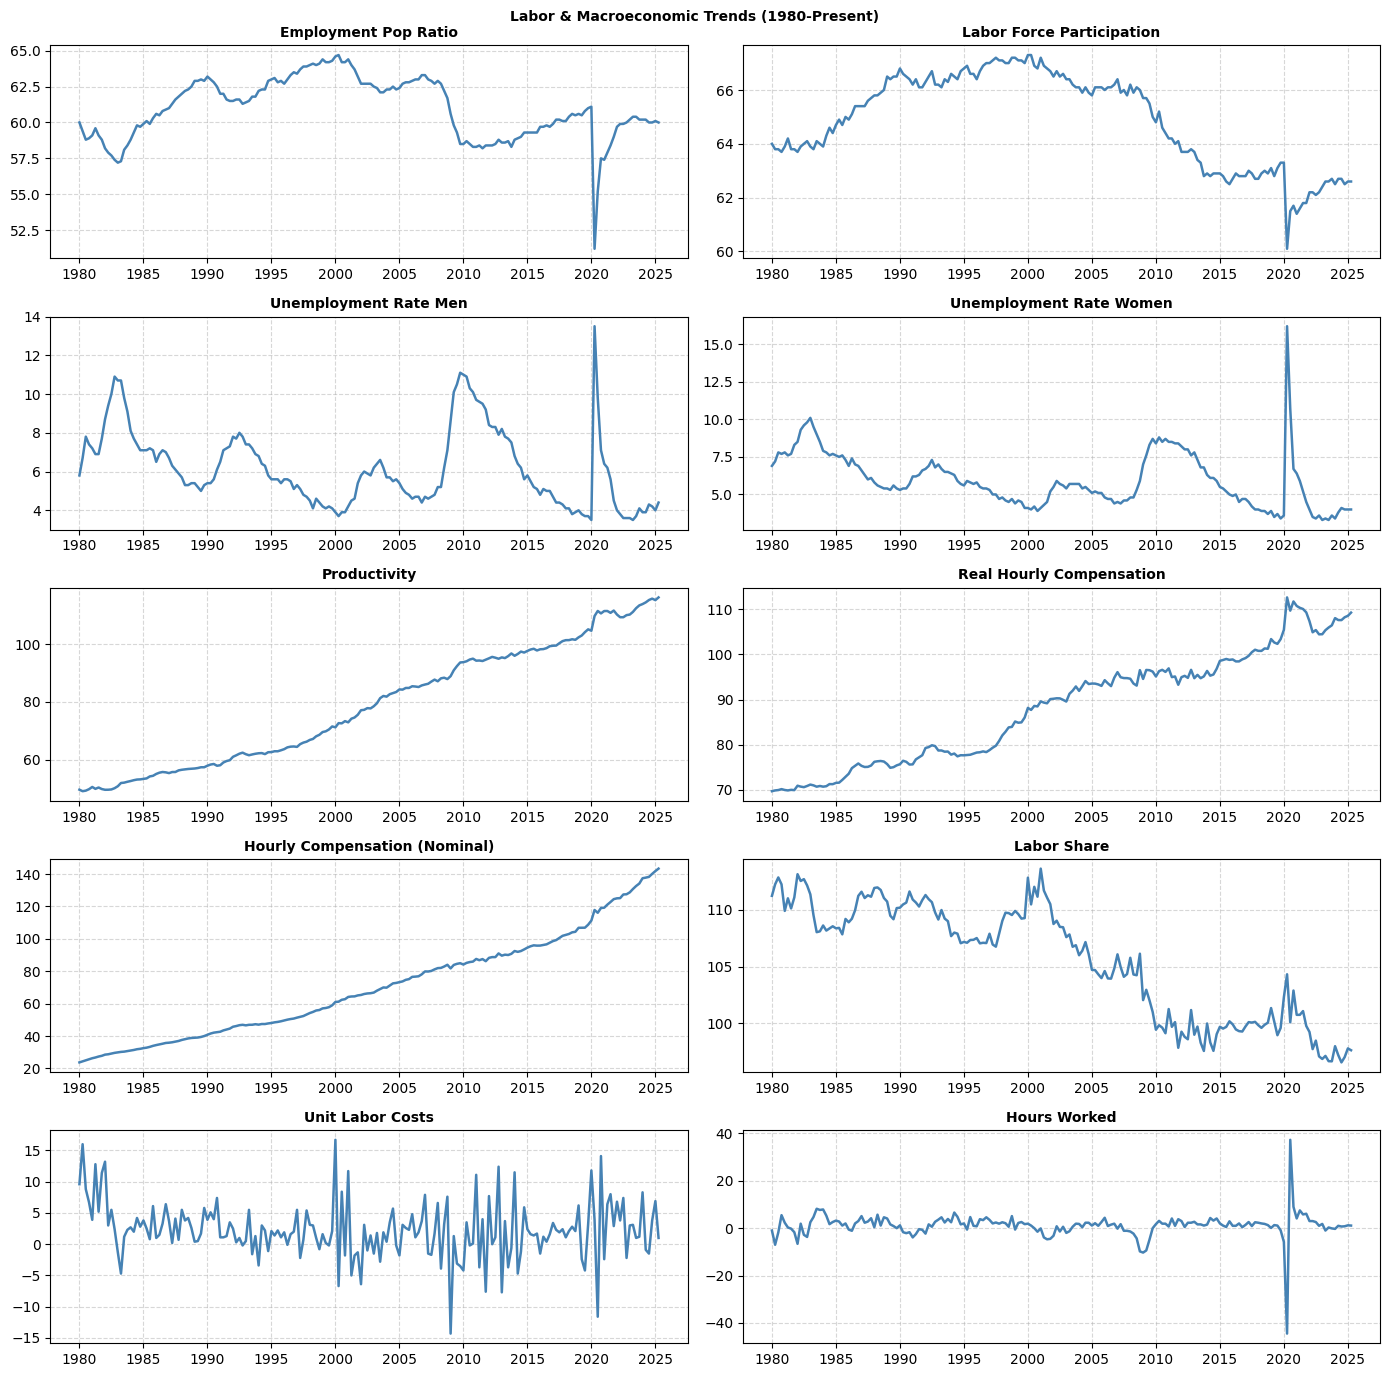

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("../data/merged/FRED_MERGED/merged_fred.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Unit Labor Costs (Smoothed)'] = df['Unit Labor Costs'].rolling(4).mean()

cols_to_plot = [
    'Employment Pop Ratio',
    'Labor Force Participation',
    'Unemployment Rate Men',
    'Unemployment Rate Women',
    'Productivity',
    'Real Hourly Compensation',
    'Hourly Compensation (Nominal)',
    'Labor Share',
    'Unit Labor Costs',
    'Hours Worked'
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].plot(df['Date'], df[col], color='steelblue', linewidth=1.8)
    axes[i].set_title(col, fontsize=10, weight='bold')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Labor & Macroeconomic Trends (1980-Present)", fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

So we see that this is tracking the ten core labor-market and productivity indicators from 198- through 2025. 

The visualization is interesting and seems a little off (unit labor costs)

Changing up some visualizations for certain rows 